# Multiple dispatch

**Multiple dispatch** is a key feature of Julia, that we will explore in this notebook.

It helps make software fast. It also makes software extensible, programmable, and downright fun to play with. 



1. Roman numerals
2. Functions


## 1. Roman numerals (for fun)

Let's define a **new struct** that represents a Roman numeral. For coding simplicity, we'll just deal with numbers between 0 and 9. 



In [1]:
struct Roman
    n::Int
end

Base.show(io::IO, r::Roman) = print(io, 'â…°' + (r.n - 1) % 10)  # nice display; 'â…°' is a Unicode Roman numeral

We can create an object of this type as follows:

In [2]:
Roman(4)

â…³

In [3]:
typeof.([5 5.0 Roman(5) "Five" '5'  5//1])

1Ã—6 Matrix{DataType}:
 Int64  Float64  Roman  String  Char  Rational{Int64}

We would like to display it nicely, in Roman numerals:

In [4]:
x = [7 1 2 5 8 9]
Roman.(x)   # equivalent to map(Roman, x)  or  [Roman(w) for w in x]

1Ã—6 Matrix{Roman}:
 â…¶  â…°  â…±  â…´  â…·  â…¸

It'd be nice to be able to add Roman numerals together like normal numbers:

In [5]:
Roman(4) + Roman(5)

MethodError: MethodError: no method matching +(::Roman, ::Roman)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at /usr/share/julia/base/operators.jl:655

But Julia doesn't know how to do that. Let's teach it by `import`ing the `+` function, which then allows us to _extend_ its definition:

In [6]:
import Base: +, *

+(a::Roman, b::Roman) = Roman(a.n + b.n)

+ (generic function with 209 methods)

In [7]:
Roman(4) + Roman(5)

â…¸

This **adds a new method** to the function `+`:

In [8]:
methods(+)

# 209 methods for generic function "+":
[1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} in Base at int.jl:87
[2] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt) in Base.GMP at gmp.jl:529
[3] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt) in Base.GMP at gmp.jl:535
[4] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat) in Base.MPFR at mpfr.jl:390
[5] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat) in Base.MPFR at mpfr.jl:398
[6] +(c::Union{Float16, Float32, Float64}, x::BigFloat) in Base.MPFR at mpfr.jl:406
[7] +(x::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/periods.jl:372
[8] +(x::P, y::P) where P<:Dates.Period in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/periods.jl:79
[9] +(x::Dates.Period, y::Dates.Period) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/periods.jl:361
[10] +(y::Dates.Period, x::Dates.CompoundPeriod) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/periods.jl:363
[11] +(y::Dates.Period, x::Dates.TimeType) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/arithmetic.jl:85
[12] +(x::Dates.Period, r::AbstractRange{<:Dates.TimeType}) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/ranges.jl:62
[13] +(y::Union{Dates.CompoundPeriod, Dates.Period}, x::AbstractArray{<:Dates.TimeType}) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/deprecated.jl:14
[14] +(A::LinearAlgebra.UnitLowerTriangular, B::LinearAlgebra.LowerTriangular) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/triangular.jl:641
[15] +(A::LinearAlgebra.UnitLowerTriangular, B::LinearAlgebra.UnitLowerTriangular) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/triangular.jl:643
[16] +(UL::LinearAlgebra.UnitLowerTriangular, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/uniformscaling.jl:182
[17] +(A::LinearAlgebra.UnitLowerTriangular, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:86
[18] +(F::LinearAlgebra.Hessenberg, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/hessenberg.jl:640
[19] +(r::AbstractRange{<:Dates.TimeType}, x::Dates.Period) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/ranges.jl:63
[20] +(x::AbstractArray{<:Dates.TimeType}, y::Union{Dates.CompoundPeriod, Dates.Period}) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/deprecated.jl:6
[21] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.SymTridiagonal) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/tridiag.jl:208
[22] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Symmetric) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:485
[23] +(A::LinearAlgebra.SymTridiagonal{var"#s857", V} where {var"#s857"<:Real, V<:AbstractVector{var"#s857"}}, B::LinearAlgebra.Hermitian) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/symmetric.jl:487
[24] +(x::LinearAlgebra.SymTridiagonal, H::LinearAlgebra.UpperHessenberg) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/hessenberg.jl:107
[25] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Diagonal) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:145
[26] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Tridiagonal) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:159
[27] +(A::LinearAlgebra.SymTridiagonal, B::LinearAlgebra.Bidiagonal) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:213
[28] +(A::LinearAlgebra.SymTridiagonal{var"#s859", V} where {var"#s859"<:Number, V<:AbstractVector{var"#s859"}}, B::LinearAlgebra.UniformScaling) in LinearAlgebra at /usr/share/julia/stdlib/v1.7/LinearAlgebra/src/special.jl:231
[29] +(x::Dates.Instant) in Dates at /usr/share/julia/stdlib/v1.7/Dates/src/arithmetic.jl:4
[30] +(A::LinearAlgebra.B

In [9]:
import Base.*
*(i::Roman, j::Roman) = Roman(i.n * j.n)                     # Multiply like a Roman

* (generic function with 365 methods)

In [10]:
Roman(3) * Roman(2)

â…µ

In [11]:
# Only 0 -- 9 are implemented for Roman, see definition
Roman(3) * Roman(4)

â…±

In [13]:
Roman.(1:3) .* [Roman(1) Roman(2) Roman(3)]

3Ã—3 Matrix{Roman}:
 â…°  â…±  â…²
 â…±  â…³  â…µ
 â…²  â…µ  â…¸

But 

In [14]:
Roman(3) * 2

MethodError: MethodError: no method matching *(::Roman, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at /usr/share/julia/base/operators.jl:655
  *(!Matched::T, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /usr/share/julia/base/int.jl:88
  *(!Matched::StridedArray{P}, ::Real) where P<:Dates.Period at /usr/share/julia/stdlib/v1.7/Dates/src/deprecated.jl:44
  ...

In [15]:
*(a::Roman,b::Int) = Roman(a.n*b)

* (generic function with 366 methods)

In [16]:
Roman(3)*2

â…µ

In [18]:
# Complicated mytimes to decide what to do based on type
# not suggested, better way coming soon (Multiple Dispatch!))
function mytimes(i,j)
    if isa(i,Roman) & isa(j,Number)
        return  fill(1, i.n, j)   # i by j matrix with ones
    elseif    isa(i,Number) & isa(j,Roman) 
        return "ðŸ˜„"^(i*j.n)   #  i * j happy faces
    else
        return("I Don't know")
    end
end

mytimes (generic function with 1 method)

In [19]:
mytimes(4,Roman(3)) # Twelve happys

"ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„"

In [20]:
mytimes(Roman(4),3) # 4x3 matrix with ones

4Ã—3 Matrix{Int64}:
 1  1  1
 1  1  1
 1  1  1
 1  1  1

The simplest thing to do is to explicitly define multiplication of a `Roman` by a number. We can do it as we see fit:

In [21]:
*(i::Number, j::Roman) = "ðŸ˜„"^(i*j.n)        #  i * j happy faces

*(i::Roman, j::Number) = fill(1, i.n, j)       # i by j matrix

* (generic function with 368 methods)

In [22]:
3 * Roman(3) # Nine happys

"ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„ðŸ˜„"

In [23]:
Roman(3) * 5  # Three by Five matrix of ones

â…´

In [24]:
t(x::Roman,y::Roman) = x.n * y.n

t (generic function with 1 method)

In [25]:
t(Roman(5),Roman(4))

20

In [26]:
# Notice how tight the assembler is!
@code_native t(Roman(2),Roman(4))

	.text
; â”Œ @ 11. Multiple dispatch revisited.ipynb:1 within `t`
; â”‚â”Œ @ int.jl:88 within `*`
	movq	(%rsi), %rax
	imulq	(%rdi), %rax
; â”‚â””
	retq
	nopl	(%rax,%rax)
; â””


In [27]:
@code_native 4+5

	.text
; â”Œ @ int.jl:87 within `+`
	leaq	(%rdi,%rsi), %rax
	retq
	nopw	%cs:(%rax,%rax)
	nop
; â””


In [28]:
typeof(t)

typeof(t) (singleton type of function t, subtype of Function)

## Functions

In [29]:
import Base: *, +, ^

In [30]:
*(Î±::Number,   g::Function) = x -> Î± * g(x)   # Scalar times function

*(f::Function, Î»::Number)   = x -> f(Î» * x)   # Scale the argument

*(f::Function, g::Function) = x -> f(g(x))    # Function composition  -- abuse of notation!  use \circ in Julia 0.6

^(f::Function, n::Integer) = n == 1 ? f : f*f^(n-1) # A naive exponentiation algorithm by recursive multiplication

^ (generic function with 70 methods)

In [31]:
+(f::Function, g::Function) = x -> f(x) + g(x)

+ (generic function with 210 methods)

For example, the exponential function is defined as

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n.$$

We can think of this just in terms of functions:

$$\exp = \sum_{n=0}^\infty \frac{1}{n!} \mathrm{pow}_n,$$

where $\mathrm{pow}_n(x) = x^n$.

(starts to blur the symbolic with the numerical!)

In [32]:
pow(n) = x -> x^n

myexp = sum(1/factorial(big(n)) * pow(n) for n in 0:100)   # taylor series not efficient!

#15 (generic function with 1 method)

In [33]:
[myexp(1); exp(1); exp(big(1))]

3-element Vector{BigFloat}:
 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
 2.718281828459045090795598298427648842334747314453125
 2.718281828459045235360287471352662497757247093699959574966967627724076630353555

In [34]:
f = x -> x^2
f(10)

100

In [35]:
g = 3f
g(10)

300

In [36]:
@which 3f

*(Î±::Number, g::Function) in Main at /home/snowztail/Repositories/Introduction-to-Julia/day2/11. Multiple dispatch revisited.ipynb:1

In [37]:
(f^2)(10)  # since we defined multiplication of functions as composition

10000

In [38]:
@which (f^2)(10)

(::var"#13#14")(x) in Main at /home/snowztail/Repositories/Introduction-to-Julia/day2/11. Multiple dispatch revisited.ipynb:5

In [39]:
using Plots;
gr()

Plots.GRBackend()

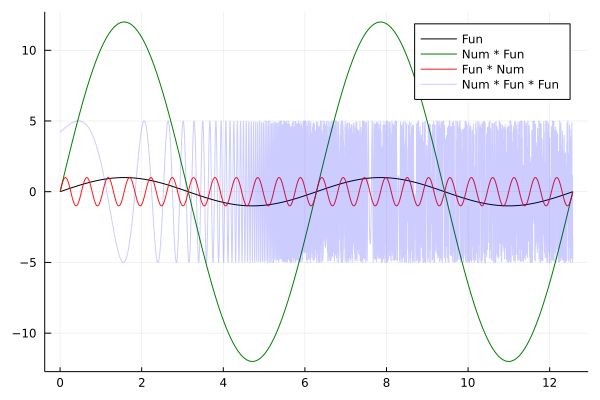

In [40]:
x = pi*(0:0.001:4)

plot(x, sin.(x),    c="black", label="Fun")
plot!(x, (12*sin).(x),    c="green", label="Num * Fun")
plot!(x, (sin*12).(x),    c="red", alpha=0.9, label="Fun * Num")
plot!(x, (5*sin*exp).(x), c="blue", alpha=0.2, label="Num * Fun * Fun")

In [ ]:
plot([12*sin, sin*12, 5*sin*exp], 0:.01:4Ï€, Î±=[1 .9 .2], c=[:green :red :blue])

###  "$Sin^2(\phi)$ is odious to me, even though Laplace made use of it; should  it be feared that $sin^2(\phi)$ might become ambiguous, which would perhaps  never occur, or at most very rarely when speaking of $sin(\phi^2)$, well  then, let us write $(sin\phi)^2$, but not $sin^2\phi$, which by analogy  should signify $sin(sin\phi)$." -- Gauss

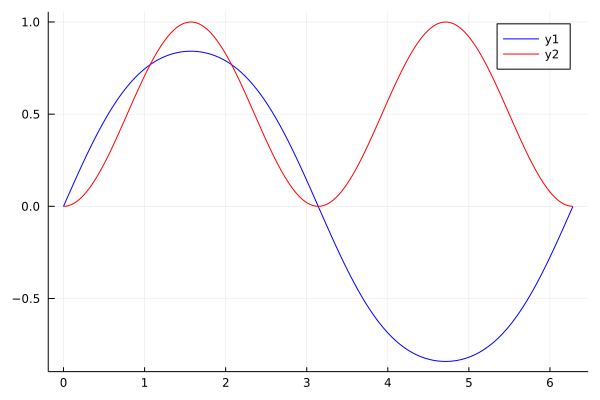

In [41]:
x=(0:.01:2) * pi;

plot(x, (sin^2).(x), c="blue")     # Squaring just works, y=sin(sin(x)), Gauss would be pleased!
plot!(x, sin.(x).^2,  c="red")         

# Exercise 
Try playing around with h

In [43]:
h(a, b::Any) = "fallback"
h(a::Number, b::Number) = "a and b are both numbers"
h(a::Number, b) = "a is a number"
h(a, b::Number) = "b is a number"
h(a::Integer, b::Integer) = "a and b are both integers"

h (generic function with 5 methods)

In [49]:
# Try playing with h
println(h("A", "B"))
println(h(0.0, 1.0))
println(h(0, "B"))
println(h("A", 1))
println(h(0, 1))

fallback
a and b are both numbers
a is a number
b is a number
a and b are both integers
